# Project 2 - Data Characterization

#### About the data: 
The obtained data shows film permits granted for New York City. Permits are generally required when asserting the exclusive use of city property, like a sidewalk, a street, or a park. I found this data through the suggestions for project 2 ideas on Blackboard. 

#### My story:
Growing up I have watched a lot of American movies and TV shows. Many of these have shown New York City. After I came to the USA I myself visited many of the places in New York City (NYC) and visualized the movies and shows I had watched as a kid. I did not get to see an actual film shoot though. So, when I saw this data, the data scientist in me thought I should figure out when do movies actually shoot in NYC. Following questions came to my mind:

1. Can this data tell me popular timing of day for film shoots?
  * The answer to the first question is that most popular time of day for shooting is between 5 AM and mid-day. 
  * Theater "shoots" are an outlier when events per hour of day are analyzed and we see a lot of them seem to happen in hour "zero" or mid-night. However, this is not an issue from the perspective of analysis as this could be reasonable and not an anomaly. This is because a lot of theater shows start in the evening and can run upto mid-night. 
  

2. Can this data tell me the popular day of the week when shooting activities occur?
  * Weekday-wise permit counts and the normalized value of the permit count show that weekends are outliers when shoots per day are considered. 
  * We were able to conclude from the number of shoots per day that weekdays are fairly well balanced in matters of shooting activities.


3. Can it tell me popular months of year for film shoots?
  * So, the answer to our third question is TV shoots happen in phases. Mostly in Fall months but some in Spring months as well. Movie shoots happen starting around Spring, peaking around summer and again a bit in the Fall.


4. Winter in New York city is very beautiful due to all the snow but are the shooting really happening in the harsh winter conditions of NYC?
  * The graph for normalized value of total number of permits per month answers our fourth question that winter is really a bad time to shoot in New York City as the number of events go down but there still are a non-zero number of shooting activities happening. This is especially true for TV shows.


5. I know some Bollywood movies have shot in Staten Island because of a large Indian community in that area but is it a popular location in general?
  * The graph of normalized value of total number of permits per borough and type of activity shows that Staten Island is NOT in-fact a popular shooting location.


6. I like a lot of web series and watch Youtube stars like Casey Neistat who films in New York City. Given the popularity of Youtube in recent times are web shoots are rising in the city?
  * After filtering out some top "shooting" categories we were able to see a clear rising trend of WEB shoot activity in New York City!


7. Which locations in New York City are popular for movie shoots?
 * WEST 48th STREET, New York City, New York is near Times Square. Intuitively this seems to be a reasonable location to be considered popular.


#### Data properties and access information:
* Download [link](https://data.cityofnewyork.us/api/views/tg4x-b46p/rows.csv?accessType=DOWNLOAD) for data source.
* Data available through [NYC Open Data site](https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p).
* Downloaded file named: "Film_Permits.csv".
* There is no cost to accessing this data.
* Accessing this data does not require creation of an account.
* Accessing this data does not violate any laws.
* This data does not appear to have been previously analyzed based on a Google search.
* A preliminary survey of the data indicates there are 40,682 rows, 14 columns, and the file size is 15.4 MB. 

In [1]:
!pip install geopy
!pip install humanize
!pip install folium

import numpy as np
import pandas as pd
import time
import datetime
from datetime import datetime
import calendar
import chardet
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import os
import random
import re
from geopy.geocoders import Nominatim
import json
import humanize
import folium
import warnings
warnings.filterwarnings("ignore")
start_time = time.time()
print('Pandas',pd.__version__)
print('Matplotlib',matplotlib.__version__)
print('Seaborn',sns.__version__)
print('File Size In MB : ',(os.path.getsize('Film_Permits.csv')/1048576),' MB')
NYC = 'New York City'

  Using cached https://files.pythonhosted.org/packages/75/3e/80bc987e1635ba9e7455b95e233b296c17f3d3bf3d4760fa67cdfc840e84/geopy-1.19.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/43/77/0287320dc4fd86ae8847bab6c34b5ec370e836a79c7b0c16680a3d9fd770/folium-0.8.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/63/36/1c93318e9653f4e414a2e0c3b98fc898b4970e939afeedeee6075dd3b703/branca-0.3.1-py3-none-any.whl
Pandas 0.23.4
Matplotlib 2.2.2
Seaborn 0.9.0
File Size In MB :  15.404823303222656  MB


## Exploring data
**Encoding check for the input CSV file to ensure data is in the right format**

In [2]:
with open('Film_Permits.csv','rb') as fraw:
    file_content = fraw.read()

In [3]:
chardet.detect(file_content)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

**Character encoding of the CSV file is ascii and confidence level is 1(100%).**

Exploring file contents from the CSV:

In [4]:
!head -n 3 Film_Permits.csv

EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
455604,Shooting Permit,12/11/2018 08:00:00 AM,12/11/2018 11:59:00 PM,12/07/2018 11:00:12 PM,"Mayor's Office of Film, Theatre & Broadcasting","STANHOPE STREET between WILSON AVENUE and MYRTLE AVENUE,  WILSON AVENUE between MELROSE STREET and GEORGE STREET,  MELROSE STREET between WILSON AVENUE and KNICKERBOCKER AVENUE,  WILSON AVENUE between STOCKHOLM STREET and STANHOPE STREET",Brooklyn,4,83,Film,Feature,United States of America,"11221, 11237"
455593,Shooting Permit,12/11/2018 07:00:00 AM,12/11/2018 09:00:00 PM,12/07/2018 05:57:34 PM,"Mayor's Office of Film, Theatre & Broadcasting","STARR AVENUE between BORDEN AVENUE and VAN DAM STREET,  REVIEW AVENUE between BORDEN AVENUE and VAN DAM STREET",Queens,2,108,Television,Episodic series,United States of America,11101


**Next, I will extract data from the CSV file and insert into a dataframe for processing**

In [5]:
pd.options.display.max_rows = 40
start_time_before_load = time.time()
film_permits_df = pd.read_csv("Film_Permits.csv")
print('Time taken to load the data : ',time.time() - start_time_before_load,'seconds')
film_permits_df.shape

Time taken to load the data :  0.3617970943450928 seconds


(40682, 14)

The csv/dataframe contains 40682 rows and 14 columns

Let us explore the data a bit using head(), tail(), info(), describe()

In [6]:
film_permits_df.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
0,455604,Shooting Permit,12/11/2018 08:00:00 AM,12/11/2018 11:59:00 PM,12/07/2018 11:00:12 PM,"Mayor's Office of Film, Theatre & Broadcasting",STANHOPE STREET between WILSON AVENUE and MYRT...,Brooklyn,4,83,Film,Feature,United States of America,"11221, 11237"
1,455593,Shooting Permit,12/11/2018 07:00:00 AM,12/11/2018 09:00:00 PM,12/07/2018 05:57:34 PM,"Mayor's Office of Film, Theatre & Broadcasting",STARR AVENUE between BORDEN AVENUE and VAN DAM...,Queens,2,108,Television,Episodic series,United States of America,11101
2,455579,Shooting Permit,12/11/2018 09:00:00 AM,12/11/2018 11:00:00 PM,12/07/2018 04:45:33 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 13 STREET between 7 AVENUE and 6 AVENUE...,Brooklyn,"1, 2","6, 90",Television,Episodic series,United States of America,"10011, 11211, 11249"
3,455560,Shooting Permit,12/10/2018 07:00:00 AM,12/10/2018 08:00:00 PM,12/07/2018 04:20:34 PM,"Mayor's Office of Film, Theatre & Broadcasting",NORTH HENRY STREET between GREENPOINT AVENUE a...,Brooklyn,1,94,Television,Episodic series,United States of America,11222
4,455559,Shooting Permit,12/11/2018 06:00:00 AM,12/11/2018 11:00:00 PM,12/07/2018 04:17:03 PM,"Mayor's Office of Film, Theatre & Broadcasting",FULTON STREET between GREENWICH STREET and CHU...,Manhattan,1,1,Commercial,Commercial,United States of America,10048


In [7]:
film_permits_df.tail()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
40677,42737,Theater Load in and Load Outs,01/02/2012 06:00:00 AM,01/18/2012 08:00:00 PM,12/15/2011 02:06:52 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 46 STREET between 7 AVENUE and 8 AVENUE,Manhattan,5,18,Theater,Theater,United States of America,10036
40678,42727,Shooting Permit,01/03/2012 08:00:00 AM,01/03/2012 10:00:00 PM,12/15/2011 01:27:48 PM,"Mayor's Office of Film, Theatre & Broadcasting",22ND STREET between QUEENS PLAZA SOUTH and 43R...,Queens,2,108,Television,Episodic series,United States of America,11101
40679,42581,Shooting Permit,01/03/2012 10:00:00 AM,01/03/2012 09:00:00 PM,12/14/2011 09:56:47 AM,"Mayor's Office of Film, Theatre & Broadcasting","46 ROAD between 5 STREET and VERNON BOULEVARD,...",Queens,2,108,Television,Episodic series,United States of America,11101
40680,42287,Shooting Permit,01/05/2012 01:00:00 PM,01/05/2012 11:30:00 PM,12/09/2011 02:08:35 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 65 STREET between BROADWAY and WEST END...,Manhattan,7,20,Theater,Theater,United States of America,10023
40681,42069,Theater Load in and Load Outs,01/02/2012 07:00:00 AM,01/27/2012 10:00:00 PM,12/07/2011 04:38:54 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 44 STREET between 7 AVENUE and 8 AVENUE,Manhattan,5,14,Theater,Theater,United States of America,10036


In [8]:
film_permits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40682 entries, 0 to 40681
Data columns (total 14 columns):
EventID              40682 non-null int64
EventType            40682 non-null object
StartDateTime        40682 non-null object
EndDateTime          40682 non-null object
EnteredOn            40682 non-null object
EventAgency          40682 non-null object
ParkingHeld          40682 non-null object
Borough              40682 non-null object
CommunityBoard(s)    40675 non-null object
PolicePrecinct(s)    40675 non-null object
Category             40682 non-null object
SubCategoryName      40682 non-null object
Country              40682 non-null object
ZipCode(s)           40675 non-null object
dtypes: int64(1), object(13)
memory usage: 4.3+ MB


In [9]:
film_permits_df.describe()

,EventID
count,40682.000000
mean,208888.733371
std,127919.445437
min,42069.000000
25%,109884.000000
50%,181806.000000
75%,251121.750000
max,455604.000000


In [10]:
film_permits_df.describe(include='all')

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
count,40682.000000,40682,40682,40682,40682,40682,40682,40682,40675,40675,40682,40682,40682,40675
unique,NaN,4,16151,19635,40470,1,24944,5,668,1923,9,29,9,3528
top,NaN,Shooting Permit,11/13/2018 06:00:00 AM,08/04/2014 09:00:00 PM,01/30/2018 12:43:07 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 48 STREET between 6 AVENUE and 7 AVENUE,Manhattan,1,94,Television,Episodic series,United States of America,11222
freq,NaN,35774,24,14,6,40682,820,20537,8827,4228,21475,11750,40635,3686
mean,208888.733371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,127919.445437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,42069.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,109884.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,181806.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,251121.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
film_permits_df.describe(include='object')

,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
count,40682,40682,40682,40682,40682,40682,40682,40675,40675,40682,40682,40682,40675
unique,4,16151,19635,40470,1,24944,5,668,1923,9,29,9,3528
top,Shooting Permit,11/13/2018 06:00:00 AM,08/04/2014 09:00:00 PM,01/30/2018 12:43:07 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 48 STREET between 6 AVENUE and 7 AVENUE,Manhattan,1,94,Television,Episodic series,United States of America,11222
freq,35774,24,14,6,40682,820,20537,8827,4228,21475,11750,40635,3686


**Next, I will explore the column metadata...**

* What are the data types for the columns in our data?
* How many unique entries are there in each column where type is object?
* Below I will exlpore the first five rows of each column where type is object?
    * Why am I exploring unique entries for objects? 
    * Because there could possibly be categorical data or datetime data in an object column.
    * After finishing the data exploration I will transform these object type columns with categorical data into 'category' type and object type columns with datetime data into 'datetime' type

In [12]:
first_n_entries=5
print('Total rows in the dataframe:', film_permits_df.shape[0])
for col, col_type in film_permits_df.dtypes.iteritems():
    if(col_type=='object'):
        print(col, 'has', film_permits_df[col].nunique(), 'unique entries')
        print('First', first_n_entries, 'entries are')
        print(film_permits_df[col][0:first_n_entries])
        print('')

Total rows in the dataframe: 40682
EventType has 4 unique entries
First 5 entries are
0    Shooting Permit
1    Shooting Permit
2    Shooting Permit
3    Shooting Permit
4    Shooting Permit
Name: EventType, dtype: object

StartDateTime has 16151 unique entries
First 5 entries are
0    12/11/2018 08:00:00 AM
1    12/11/2018 07:00:00 AM
2    12/11/2018 09:00:00 AM
3    12/10/2018 07:00:00 AM
4    12/11/2018 06:00:00 AM
Name: StartDateTime, dtype: object

EndDateTime has 19635 unique entries
First 5 entries are
0    12/11/2018 11:59:00 PM
1    12/11/2018 09:00:00 PM
2    12/11/2018 11:00:00 PM
3    12/10/2018 08:00:00 PM
4    12/11/2018 11:00:00 PM
Name: EndDateTime, dtype: object

EnteredOn has 40470 unique entries
First 5 entries are
0    12/07/2018 11:00:12 PM
1    12/07/2018 05:57:34 PM
2    12/07/2018 04:45:33 PM
3    12/07/2018 04:20:34 PM
4    12/07/2018 04:17:03 PM
Name: EnteredOn, dtype: object

EventAgency has 1 unique entries
First 5 entries are
0    Mayor's Office of Film, Th

* In the data set, there are Thirteen object type columns: EventType, StartDateTime, EndDateTime, EnteredOn, EventAgency, ParkingHeld, Borough, CommunityBoard(s), PolicePrecinct(s), Category, SubCategoryName, Country and ZipCode(s)

### Data Type Transformation
* Now, I will count the frequency of these unique values per column and print frequency of top five most frequent elements.
* I will check if a column with object data type has categorical data or not?
* I will check if a column with object data type has datetime data or not?
* If and when necessary, I will perform some transformations on the data.

In [13]:
for this_column in film_permits_df.columns:
    print('====', this_column, 'has', film_permits_df[this_column].nunique(), 'unique entries ====')
    print(film_permits_df[this_column].value_counts().head(5))
    print('')

==== EventID has 40682 unique entries ====
66602     1
126487    1
125565    1
50657     1
179741    1
Name: EventID, dtype: int64

==== EventType has 4 unique entries ====
Shooting Permit                  35774
Theater Load in and Load Outs     3380
Rigging Permit                    1028
DCAS Prep/Shoot/Wrap Permit        500
Name: EventType, dtype: int64

==== StartDateTime has 16151 unique entries ====
11/13/2018 06:00:00 AM    24
12/01/2014 06:00:00 AM    22
10/06/2014 06:00:00 AM    20
11/19/2018 06:00:00 AM    20
10/24/2018 06:00:00 AM    20
Name: StartDateTime, dtype: int64

==== EndDateTime has 19635 unique entries ====
08/04/2014 09:00:00 PM    14
09/22/2015 10:00:00 PM    14
08/31/2015 09:00:00 PM    14
11/18/2015 10:00:00 PM    14
10/05/2015 09:00:00 PM    13
Name: EndDateTime, dtype: int64

==== EnteredOn has 40470 unique entries ====
01/30/2018 12:43:07 PM    6
06/12/2012 06:58:12 PM    5
05/28/2018 09:52:30 AM    5
10/03/2018 01:48:16 PM    4
07/03/2018 12:45:41 PM    4
N

* After exploring the data I observed that EventType, EventAgency, Borough, Category, SubCategoryName and Country columns contain categorical data.
* I will transform these columns into 'category' data type.
* Also StartDateTime, EndDateTime, EnteredOn columns contain datetime data.
* I will transform the above three columns into 'datetime' data type.

In [14]:
"""
Next, I transform the object data type for EventType to 'category' data type
"""
film_permits_df['EventType'] = film_permits_df['EventType'].astype('category')
film_permits_df['EventType'].dtype

CategoricalDtype(categories=['DCAS Prep/Shoot/Wrap Permit', 'Rigging Permit',
                  'Shooting Permit', 'Theater Load in and Load Outs'],
                 ordered=False)

In [15]:
"""
Next, I transform the object data type for EventAgency to 'category' data type
"""
film_permits_df['EventAgency'] = film_permits_df['EventAgency'].astype('category')
film_permits_df['EventAgency'].dtype

CategoricalDtype(categories=['Mayor's Office of Film, Theatre & Broadcasting'], ordered=False)

In [16]:
"""
Next, I transform the object data type for Borough to 'category' data type
"""
film_permits_df['Borough'] = film_permits_df['Borough'].astype('category')
film_permits_df['Borough'].dtype

CategoricalDtype(categories=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], ordered=False)

In [17]:
"""
Next, I transform the object data type for Category to 'category' data type
"""
film_permits_df['Category'] = film_permits_df['Category'].astype('category')
film_permits_df['Category'].dtype

CategoricalDtype(categories=['Commercial', 'Documentary', 'Film', 'Music Video',
                  'Still Photography', 'Student', 'Television', 'Theater',
                  'WEB'],
                 ordered=False)

In [18]:
"""
Next, I transform the object data type for SubCategoryName to 'category' data type
"""
film_permits_df['SubCategoryName'] = film_permits_df['SubCategoryName'].astype('category')
film_permits_df['SubCategoryName'].dtype

CategoricalDtype(categories=['Cable-daily', 'Cable-episodic', 'Cable-other', 'Children',
                  'Commercial', 'Daytime soap', 'Episodic series', 'Feature',
                  'Game show', 'Independent Artist', 'Industrial/Corporate',
                  'Made for TV/mini-series', 'Magazine Show', 'Morning Show',
                  'News', 'Not Applicable', 'PSA', 'Pilot', 'Promo', 'Reality',
                  'Short', 'Signed Artist', 'Special/Awards Show',
                  'Student Film', 'Syndication/First Run', 'Talk Show',
                  'Theater', 'Trailers', 'Variety'],
                 ordered=False)

In [19]:
"""
Next, I transform the object data type for Country to 'category' data type
"""
film_permits_df['Country'] = film_permits_df['Country'].astype('category')
film_permits_df['Country'].dtype

CategoricalDtype(categories=['Australia', 'Canada', 'France', 'Germany', 'Japan',
                  'Netherlands', 'Panama', 'United Kingdom',
                  'United States of America'],
                 ordered=False)

In [20]:
def get_date(d1):
    return datetime.strptime(d1,"%m/%d/%Y %I:%M:%S %p").strftime('%m/%d/%Y %H:%M:%S')

In [21]:
"""
Next, I transform the object data type for StartDateTime to 'datetime' data type
"""
film_permits_df['StartDateTime']=film_permits_df['StartDateTime'].astype(str)
film_permits_df['StartDateTime']=film_permits_df['StartDateTime'].apply(get_date)

film_permits_df['StartDateTime']=pd.to_datetime(
                                  film_permits_df['StartDateTime'],
                                  format='%m/%d/%Y %H:%M:%S')

In [22]:
"""
Next, I transform the object data type for EndDateTime to 'datetime' data type
"""
film_permits_df['EndDateTime']=film_permits_df['EndDateTime'].astype(str)
film_permits_df['EndDateTime']=film_permits_df['EndDateTime'].apply(get_date)

film_permits_df['EndDateTime']=pd.to_datetime(
                                  film_permits_df['EndDateTime'],
                                  format='%m/%d/%Y %H:%M:%S')

In [23]:
"""
Next, I transform the object data type for EnteredOn to 'datetime' data type
"""
film_permits_df['EnteredOn']=film_permits_df['EnteredOn'].astype(str)
film_permits_df['EnteredOn']=film_permits_df['EnteredOn'].apply(get_date)

film_permits_df['EnteredOn']=pd.to_datetime(
                                  film_permits_df['EnteredOn'],
                                  format='%m/%d/%Y %H:%M:%S')

#### Let us look at the data types of columns after transformation 

In [24]:
film_permits_df.dtypes

EventID                       int64
EventType                  category
StartDateTime        datetime64[ns]
EndDateTime          datetime64[ns]
EnteredOn            datetime64[ns]
EventAgency                category
ParkingHeld                  object
Borough                    category
CommunityBoard(s)            object
PolicePrecinct(s)            object
Category                   category
SubCategoryName            category
Country                    category
ZipCode(s)                   object
dtype: object

#### Now the dataframe has...
* Four object type columns: ParkingHeld, CommunityBoard(s), PolicePrecinct(s) and ZipCode(s)
* Three datetime Type columns: StartDateTime, EndDateTime and EnteredOn
* Six categorical columns: EventType, EventAgency, Borough, Category, SubCategoryName and Country
* One numerical columns: EventID with data type int64

## Data clean up, Missing data detection and Fill up

Black = filled; white = empty

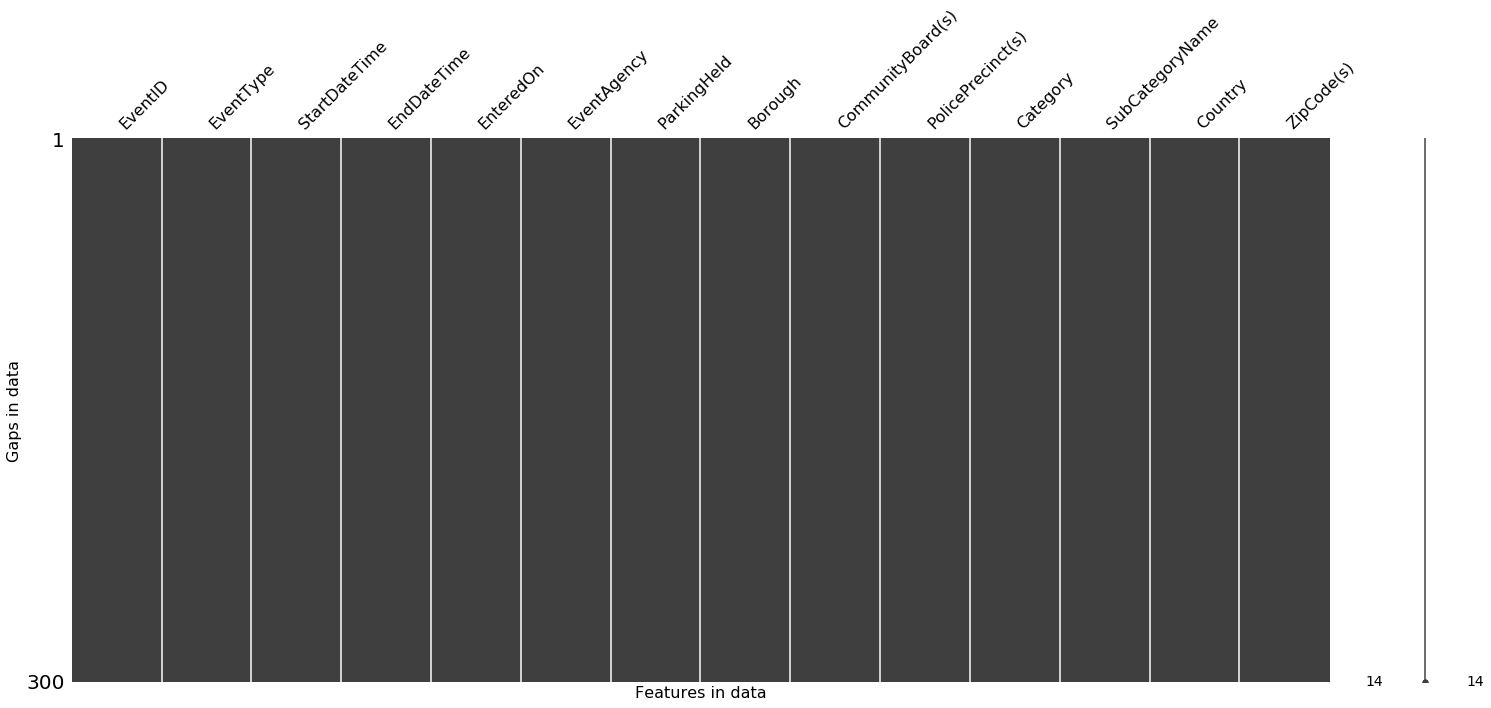

In [25]:
"""
Searching for missing data in sample set of 300 randomly selected data points
"""
_=msno.matrix(film_permits_df.sample(300))
plt.xlabel('Features in data',fontsize=16)
plt.ylabel('Gaps in data',fontsize=16)
plt.show()

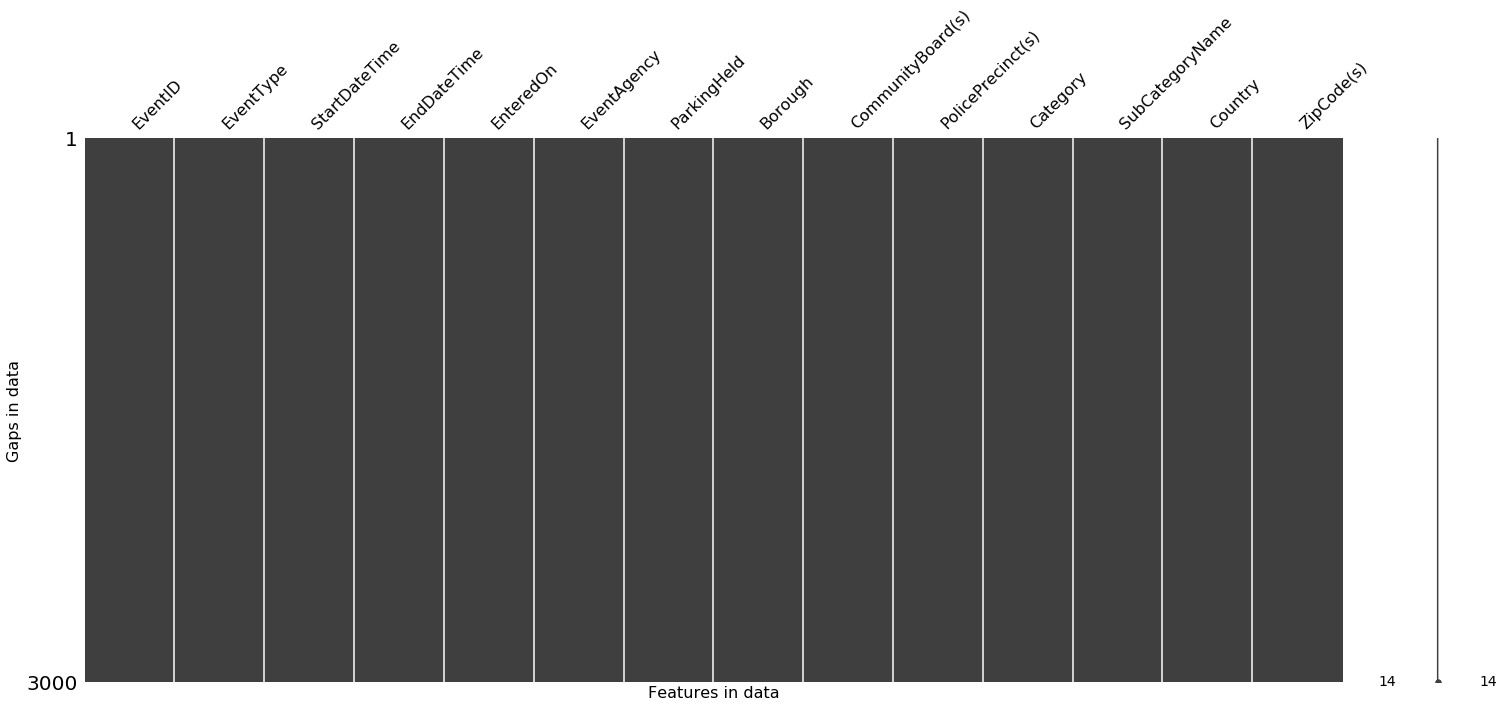

In [26]:
"""
Searching for missing data in sample set of 3000 randomly selected data points
"""
_=msno.matrix(film_permits_df.sample(3000))
plt.xlabel('Features in data',fontsize=16)
plt.ylabel('Gaps in data',fontsize=16)
plt.show()

#### Data Clean up
The data looks fairly clean to me from the graphs above but jsut to make sure, I will perform the following tasks:
* Drop all rows and columns where entire row or column is NaN.
* Drop columns with duplicate data or with 50% missing value.
* Drop columns where all rows have the same value.
    * Such columns have no data variety and nothing useful to contribute to my data analysis.

In [27]:
print('Shape of data frame before Cleanup :',film_permits_df.shape)

print('Drop all rows and columns where entire row or column is NaN.')
film_permits_df.dropna(how='all',axis=0,inplace=True) # rows 
film_permits_df.dropna(how='all',axis=1,inplace=True) # columns

print('Drop columns with duplicate data or with 50% missing value.')
half_count = len(film_permits_df)*.5
film_permits_df = film_permits_df.dropna(thresh=half_count, axis=1)
film_permits_df = film_permits_df.drop_duplicates()

print('Drop columns where all rows have the same value.')
for this_column in film_permits_df.columns:
    if (film_permits_df[this_column].nunique()==1):
        unique_entry=film_permits_df.iloc[0][this_column]
        print('Drop column ',this_column,' where all rows have the same value : ', unique_entry)
        film_permits_df.drop([this_column],axis=1,inplace=True)
        
print('Shape of data frame after cleanup :',film_permits_df.shape)

Shape of data frame before Cleanup : (40682, 14)
Drop all rows and columns where entire row or column is NaN.
Drop columns with duplicate data or with 50% missing value.
Drop columns where all rows have the same value.
Drop column  EventAgency  where all rows have the same value :  Mayor's Office of Film, Theatre & Broadcasting
Shape of data frame after cleanup : (40682, 13)


#### Through the above process I was able to conclude that in my dataset...
* There are no rows and columns where entire row or column is NaN.
* There are no columns with duplicate data and with 50% missing value.
* There is one column, EventAgency where all rows have the same value. 
    - Hence, I will be dropping the column EventAgency as it has no data variety and nothing useful to contribute to my data analysis..

### Missing data detection and fill up using random sampling in a meaningful way 
**That is get data from the same borough**

In [28]:
film_permits_df.head().T

,0,1,2,3,4
EventID,455604,455593,455579,455560,455559
EventType,Shooting Permit,Shooting Permit,Shooting Permit,Shooting Permit,Shooting Permit
StartDateTime,2018-12-11 08:00:00,2018-12-11 07:00:00,2018-12-11 09:00:00,2018-12-10 07:00:00,2018-12-11 06:00:00
EndDateTime,2018-12-11 23:59:00,2018-12-11 21:00:00,2018-12-11 23:00:00,2018-12-10 20:00:00,2018-12-11 23:00:00
EnteredOn,2018-12-07 23:00:12,2018-12-07 17:57:34,2018-12-07 16:45:33,2018-12-07 16:20:34,2018-12-07 16:17:03
ParkingHeld,STANHOPE STREET between WILSON AVENUE and MYRT...,STARR AVENUE between BORDEN AVENUE and VAN DAM...,WEST 13 STREET between 7 AVENUE and 6 AVENUE...,NORTH HENRY STREET between GREENPOINT AVENUE a...,FULTON STREET between GREENWICH STREET and CHU...
Borough,Brooklyn,Queens,Brooklyn,Brooklyn,Manhattan
CommunityBoard(s),4,2,"1, 2",1,1
PolicePrecinct(s),83,108,"6, 90",94,1
Category,Film,Television,Television,Television,Commercial


In [29]:
"""
Counting null data per column 
"""
film_permits_df.isnull().sum()

EventID              0
EventType            0
StartDateTime        0
EndDateTime          0
EnteredOn            0
ParkingHeld          0
Borough              0
CommunityBoard(s)    7
PolicePrecinct(s)    7
Category             0
SubCategoryName      0
Country              0
ZipCode(s)           7
dtype: int64

In [30]:
"""
Percentage of missing data per column
"""
(film_permits_df.isnull().sum()/len(film_permits_df)).sort_values(ascending=False)

ZipCode(s)           0.000172
PolicePrecinct(s)    0.000172
CommunityBoard(s)    0.000172
Country              0.000000
SubCategoryName      0.000000
Category             0.000000
Borough              0.000000
ParkingHeld          0.000000
EnteredOn            0.000000
EndDateTime          0.000000
StartDateTime        0.000000
EventType            0.000000
EventID              0.000000
dtype: float64

#### We were able to find that ZipCode(s), PolicePrecinct(s), CommunityBoard(s) columns have some missing data

**Filling up missing data through sampling of data in same boroughs**

In [31]:
print("Data index for missing ZipCode(s)",list(film_permits_df[film_permits_df['ZipCode(s)'].isnull()].index))
print("Data index for missing CommunityBoard(s)",list(film_permits_df[film_permits_df['CommunityBoard(s)'].isnull()].index))
print("Data index for missing PolicePrecinct(s)",list(film_permits_df[film_permits_df['PolicePrecinct(s)'].isnull()].index))

Data index for missing ZipCode(s) [1138, 6038, 17714, 20833, 23054, 26856, 39837]
Data index for missing CommunityBoard(s) [1138, 6038, 17714, 20833, 23054, 26856, 39837]
Data index for missing PolicePrecinct(s) [1138, 6038, 17714, 20833, 23054, 26856, 39837]


In [32]:
'''
Viewing the missing data
'''
film_permits_df.iloc[[1138, 6038, 17714, 20833, 23054, 26856, 39837]]

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
1138,447520,Shooting Permit,2018-11-01 16:00:00,2018-11-02 03:00:00,2018-10-28 16:56:02,"Center Blvd between 55th Ave and 57th Ave, 57...",Queens,NaN,NaN,Still Photography,Not Applicable,United States of America,NaN
6038,413934,Shooting Permit,2018-05-03 12:00:00,2018-05-03 22:00:00,2018-04-30 10:30:17,MANGIN STREET between DELANCY STREET and DELAN...,Manhattan,NaN,NaN,Television,Episodic series,United States of America,NaN
17714,194942,Shooting Permit,2015-01-06 16:00:00,2015-01-07 01:00:00,2014-12-18 12:23:13,Withers St between Meeker Ave and Union Ave,Brooklyn,NaN,NaN,Television,Cable-episodic,United States of America,NaN
20833,179034,Shooting Permit,2014-08-30 12:00:00,2014-08-30 22:00:00,2014-08-28 13:49:39,Victory Boulevard between Wild Avenue and Crab...,Staten Island,NaN,NaN,Film,Feature,United States of America,NaN
23054,162029,Shooting Permit,2014-05-28 07:00:00,2014-05-28 12:00:00,2014-05-27 13:22:10,West 67th Street between Columbus Ave and Cent...,Manhattan,NaN,NaN,Television,Talk Show,United States of America,NaN
26856,128473,Shooting Permit,2013-11-11 08:00:00,2013-11-11 20:00:00,2013-11-06 10:22:50,AMSTERDAM AVENUE between WEST 62 STREET and ...,Manhattan,NaN,NaN,Television,Cable-other,United States of America,NaN
39837,47343,Shooting Permit,2012-02-23 13:00:00,2012-02-23 17:00:00,2012-02-22 14:33:38,PEARL ST between HANOVER SQUARE and COENTIES A...,Manhattan,NaN,NaN,Television,Episodic series,United States of America,NaN


In [33]:
'''
Boroguh based sampling for ZipCode(s), PolicePrecinct(s), CommunityBoard(s) data 
'''
zipcode_smapling_dict={}
communityboard_smapling_dict={}
policeprecinc_smapling_dict={}
null_index=list(film_permits_df[film_permits_df['ZipCode(s)'].isnull()].index)
print(null_index)

for indx in null_index:
    print('index :',indx)
    this_borough=film_permits_df.iloc[indx]['Borough']
    print(this_borough)
    sample_zipcode=random.choice(list(film_permits_df[(film_permits_df['Borough']==this_borough) 
                                                        & (film_permits_df['ZipCode(s)'].notnull())]['ZipCode(s)']))
    sample_communityboard=random.choice(list(film_permits_df[(film_permits_df['Borough']==this_borough) 
                                                        & (film_permits_df['CommunityBoard(s)'].notnull())]['CommunityBoard(s)']))
    sample_policeprecinct=random.choice(list(film_permits_df[(film_permits_df['Borough']==this_borough) 
                                                        & (film_permits_df['PolicePrecinct(s)'].notnull())]['PolicePrecinct(s)']))
    
    zipcode_smapling_dict[indx]=sample_zipcode
    communityboard_smapling_dict[indx]=sample_communityboard
    policeprecinc_smapling_dict[indx]=sample_policeprecinct
    
print(zipcode_smapling_dict)
print(communityboard_smapling_dict)
print(policeprecinc_smapling_dict)

[1138, 6038, 17714, 20833, 23054, 26856, 39837]
index : 1138
Queens
index : 6038
Manhattan
index : 17714
Brooklyn
index : 20833
Staten Island
index : 23054
Manhattan
index : 26856
Manhattan
index : 39837
Manhattan
{1138: '11101', 6038: '10036', 17714: '11205, 11222', 20833: '10304', 23054: '10011, 10023', 26856: '10036', 39837: '10011'}
{1138: '2', 6038: '1, 8', 17714: '1', 20833: '1', 23054: '64, 8', 26856: '5', 39837: '6, 8'}
{1138: '101', 6038: '14', 17714: '84', 20833: '120', 23054: '23', 26856: '30', 39837: '18'}


In [34]:
'''
Filling up the missing values with sampled data
'''
film_permits_df['ZipCode(s)'].fillna(zipcode_smapling_dict,inplace=True)
film_permits_df['CommunityBoard(s)'].fillna(communityboard_smapling_dict,inplace=True)
film_permits_df['PolicePrecinct(s)'].fillna(policeprecinc_smapling_dict,inplace=True)

In [35]:
'''
Checking filled up data
'''
film_permits_df.iloc[[1138, 6038, 17714, 20833, 23054, 26856, 39837]]

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
1138,447520,Shooting Permit,2018-11-01 16:00:00,2018-11-02 03:00:00,2018-10-28 16:56:02,"Center Blvd between 55th Ave and 57th Ave, 57...",Queens,2,101,Still Photography,Not Applicable,United States of America,11101
6038,413934,Shooting Permit,2018-05-03 12:00:00,2018-05-03 22:00:00,2018-04-30 10:30:17,MANGIN STREET between DELANCY STREET and DELAN...,Manhattan,"1, 8",14,Television,Episodic series,United States of America,10036
17714,194942,Shooting Permit,2015-01-06 16:00:00,2015-01-07 01:00:00,2014-12-18 12:23:13,Withers St between Meeker Ave and Union Ave,Brooklyn,1,84,Television,Cable-episodic,United States of America,"11205, 11222"
20833,179034,Shooting Permit,2014-08-30 12:00:00,2014-08-30 22:00:00,2014-08-28 13:49:39,Victory Boulevard between Wild Avenue and Crab...,Staten Island,1,120,Film,Feature,United States of America,10304
23054,162029,Shooting Permit,2014-05-28 07:00:00,2014-05-28 12:00:00,2014-05-27 13:22:10,West 67th Street between Columbus Ave and Cent...,Manhattan,"64, 8",23,Television,Talk Show,United States of America,"10011, 10023"
26856,128473,Shooting Permit,2013-11-11 08:00:00,2013-11-11 20:00:00,2013-11-06 10:22:50,AMSTERDAM AVENUE between WEST 62 STREET and ...,Manhattan,5,30,Television,Cable-other,United States of America,10036
39837,47343,Shooting Permit,2012-02-23 13:00:00,2012-02-23 17:00:00,2012-02-22 14:33:38,PEARL ST between HANOVER SQUARE and COENTIES A...,Manhattan,"6, 8",18,Television,Episodic series,United States of America,10011


In [36]:
film_permits_df.isnull().sum()

EventID              0
EventType            0
StartDateTime        0
EndDateTime          0
EnteredOn            0
ParkingHeld          0
Borough              0
CommunityBoard(s)    0
PolicePrecinct(s)    0
Category             0
SubCategoryName      0
Country              0
ZipCode(s)           0
dtype: int64

**Missing data have been filled up successfully for ZipCode(s), PolicePrecinct(s), CommunityBoard(s) columns**

## Start of data analysis - Visualization and Exploratory Data Analysis
***... for Film Permit data in New York City***

Let's ask our data some questions about film permits in New York City.
* How many types of "shooting" activities are happening in New York City? 
* What kind of "shooting" activities are these?

In [37]:
print("There are",film_permits_df['Category'].nunique(),
      "kinds of \"shooting\" activities happening in",NYC)
for shoot_category in film_permits_df['Category'].unique():
    print(shoot_category)

There are 9 kinds of "shooting" activities happening in New York City
Film
Television
Commercial
WEB
Theater
Still Photography
Documentary
Student
Music Video


* How many permits for each category of "shooting" activity have been granted in New York City?

In [38]:
film_permits_df['Category'].value_counts()

Television           21475
Film                  7322
Theater               3735
Commercial            3471
Still Photography     2627
WEB                   1416
Student                275
Documentary            209
Music Video            152
Name: Category, dtype: int64

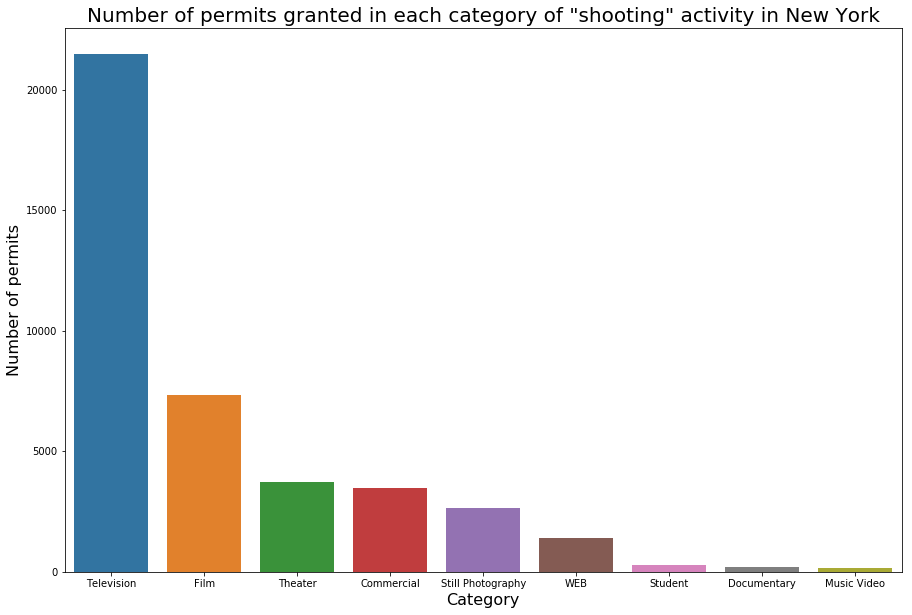

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(x='Category',data=film_permits_df,order=film_permits_df['Category'].value_counts().index)
plt.title("Number of permits granted in each category of \"shooting\" activity in New York",fontsize=20)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Number of permits",fontsize=16)
plt.show()

* How many kinds of events are being granted permits in New York City? 
* What are these event categories?

In [40]:
print("There are",film_permits_df['EventType'].nunique(),
      "kinds of events that are being granted permits in",NYC)
for permit_category in film_permits_df['EventType'].unique():
    print(permit_category)

There are 4 kinds of events that are being granted permits in New York City
Shooting Permit
Rigging Permit
Theater Load in and Load Outs
DCAS Prep/Shoot/Wrap Permit


* How many permits have been granted per category of event?

In [41]:
film_permits_df['EventType'].value_counts()

Shooting Permit                  35774
Theater Load in and Load Outs     3380
Rigging Permit                    1028
DCAS Prep/Shoot/Wrap Permit        500
Name: EventType, dtype: int64

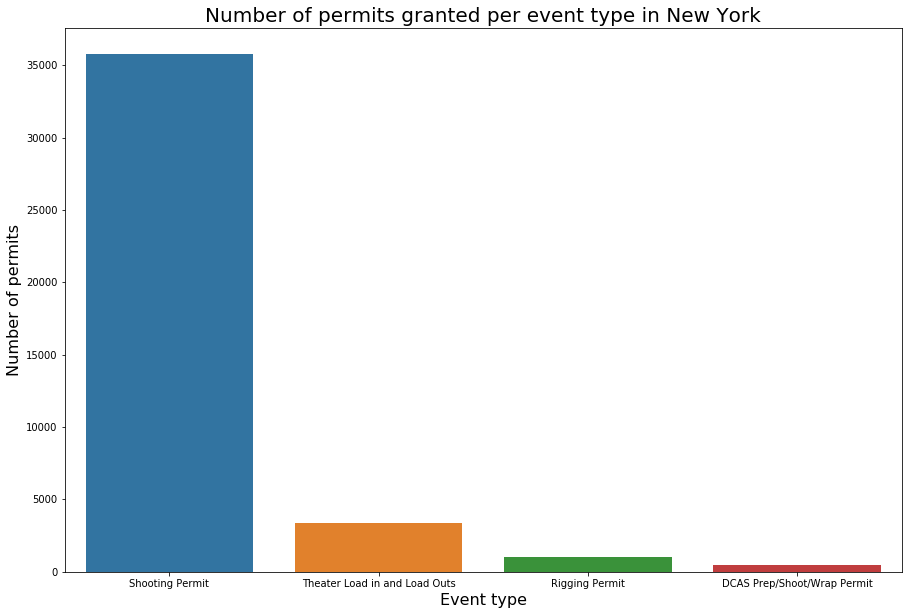

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(x='EventType',data=film_permits_df,order=film_permits_df['EventType'].value_counts().index)
plt.title("Number of permits granted per event type in New York",fontsize=20)
plt.xlabel("Event type",fontsize=16)
plt.ylabel("Number of permits",fontsize=16)
plt.show()

* Do all boroughs in New York City see some "shooting" activity? 
* Which boroughs are shoot permits being granted for? 

In [43]:
if film_permits_df['Borough'].nunique() == 5:
    print("Yes, shoot permits are being granted for:")
else:
    print("No, shoot permits are being granted for:")
for boroughs in film_permits_df['Borough'].unique():
    print(boroughs)

Yes, shoot permits are being granted for:
Brooklyn
Queens
Manhattan
Bronx
Staten Island


* How many "shooting" activities are happening in each borough?

In [44]:
film_permits_df['Borough'].value_counts()

Manhattan        20537
Brooklyn         12263
Queens            6277
Bronx             1100
Staten Island      505
Name: Borough, dtype: int64

I assume that a lot of foreign movies are shot in New York City. Its not just movies from Hollywood/USA. 
* Is that assumption true? 
* Which countries are shooting movies in New York?

In [45]:
if film_permits_df['Country'].nunique() == 1 and film_permits_df['Country'].unique() == 'United States of America':
    print("No, it is not true. Only US based shoots are happening in",NYC)
else:
    print("Yes, it is true. All the following countries come to shoot in",NYC)
for countries in film_permits_df['Country'].unique():
    print(countries)

Yes, it is true. All the following countries come to shoot in New York City
United States of America
France
Australia
Canada
United Kingdom
Panama
Netherlands
Japan
Germany


How many shoots are happening per country?

In [46]:
film_permits_df['Country'].value_counts()

United States of America    40635
United Kingdom                 10
Japan                           8
Panama                          7
France                          7
Canada                          6
Australia                       5
Netherlands                     3
Germany                         1
Name: Country, dtype: int64

**Method defined to compute normalized value for a series**

Formula for normalization [used](https://www.statisticshowto.datasciencecentral.com/normalized/) is as follows:

$\mathbf{X_{new}} = {X - X_{min} \over X_{max} - X_{min}}$

In [47]:
'''
This method will return the value normalized between 0 and 1, for a number in a series 
given the number, maximum value and minimum value in the series
'''
def compute_norm(number, max_val, min_val):
    return (number - min_val)/(max_val - min_val)

In [48]:
'''
This method will take a series and return a df with the normalized values for that series.
Created as we will reuse this a number of times.
'''
def get_normalized_value_df(series_to_process, category_col_name, count_col_name):
    column_list = []
    column_list.append(category_col_name)
    column_list.append(count_col_name)
    series_to_df = pd.DataFrame(list(series_to_process.items()), columns=column_list)

    normalized_value_list = []
    for num in np.array(series_to_df[count_col_name]):
        normalized_value_list.append(compute_norm(number=float(num),
                                                  max_val=float(series_to_process.nlargest(1)), 
                                                  min_val=float(series_to_process.nsmallest(1))
                                                 )
                                    )
    series_to_df['norm_'+count_col_name] = normalized_value_list
    return series_to_df

## Processing date time to extract year, month, hour, day of event

In [49]:
'''
Computing the number of shooting permits per year
'''
film_permits_df['Year'] = film_permits_df['StartDateTime'].apply(lambda time: time.year)
film_permits_df['Month'] = (film_permits_df['StartDateTime'].dt.month).apply(lambda x : calendar.month_abbr[x])
film_permits_df['Hour'] = film_permits_df['StartDateTime'].apply(lambda time: time.hour)
film_permits_df['Year'].value_counts()

2015    8958
2018    8758
2013    8094
2014    7962
2012    6910
Name: Year, dtype: int64

In [50]:
'''
Computing the number of shooting permits per month
'''
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
film_permits_df['Year'] = film_permits_df['StartDateTime'].apply(lambda time: time.year)
film_permits_df['Hour'] = film_permits_df['StartDateTime'].apply(lambda time: time.hour)
film_permits_df['Month'] = pd.Categorical(
    film_permits_df['Month'], 
    categories=months,
    ordered=True)
film_permits_df['Month'].value_counts()

Oct    4877
Nov    4014
Sep    3841
Aug    3785
Jul    3463
Mar    3392
May    3364
Jun    3186
Apr    3031
Dec    2746
Feb    2706
Jan    2277
Name: Month, dtype: int64

In [51]:
'''
Computing the number of shooting permits per weekday
'''
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
film_permits_df["Weekday"] = film_permits_df['StartDateTime'].dt.weekday_name
film_permits_df['Weekday'] = pd.Categorical(
    film_permits_df['Weekday'],
    categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], 
    ordered=True)
film_permits_df['Weekday'].value_counts()

Thursday     7682
Wednesday    7387
Friday       7227
Tuesday      7192
Monday       6462
Saturday     2624
Sunday       2108
Name: Weekday, dtype: int64

**Extracting the top five category of shooting a activity for processing**

In [52]:
top_category = film_permits_df['Category'].value_counts().head(5).index.values
top_category

[Television, Film, Theater, Commercial, Still Photography]
Categories (9, object): [Commercial, Documentary, Film, Music Video, ..., Student, Television, Theater, WEB]

In [53]:
top_category_df = film_permits_df[(film_permits_df['Category']=='Television')|(film_permits_df['Category']=='Film')
                                |(film_permits_df['Category']=='Theater')|(film_permits_df['Category']=='Commercial')
                                |(film_permits_df['Category']=='Still Photography')]

In [54]:
top_category_pivot_df=top_category_df.pivot_table(values='EventID', index='Month', columns='Year', aggfunc=np.size)

### Next, we move onto the important questions we wanted to answer:
First on list, we have:
* "Can this data tell me popular timing of day for film shoots?"
* "Can this data tell me the popular day of the week when shooting activities occur?"

* To answer the first question, let's find out the hour of events for top five category of shooting activity

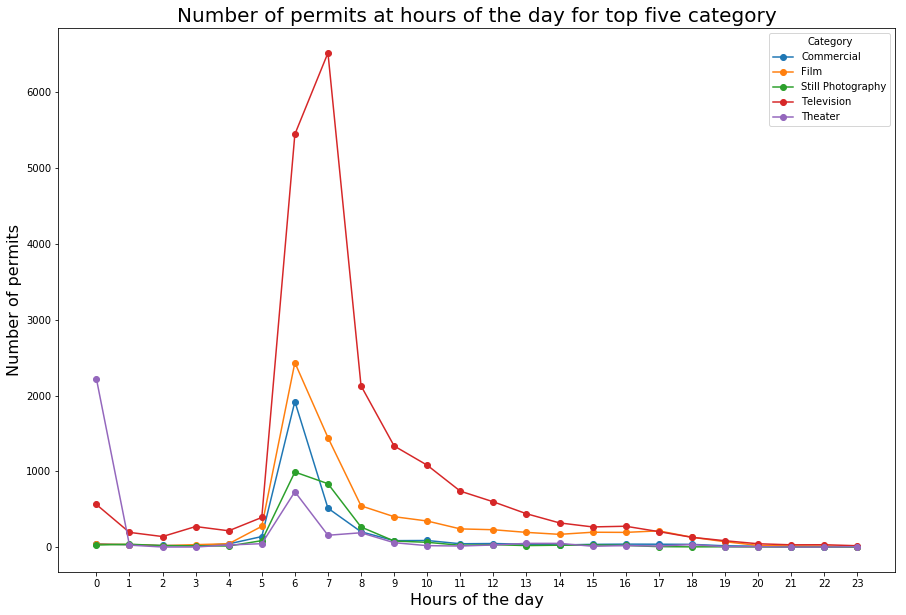

In [55]:
top_category_hour_pivot = top_category_df.pivot_table(values='EventID', 
                                                     index='Category',
                                                     columns=top_category_df['StartDateTime'].dt.hour, 
                                                     aggfunc=np.size)
top_category_df.groupby([top_category_df['StartDateTime'].dt.hour,
                         'Category',])['EventID'].count().unstack().plot(marker='o',figsize=(15,10))
plt.title('Number of permits at hours of the day for top five category',fontsize=20)
plt.ylabel('Number of permits',fontsize=16)
plt.xlabel('Hours of the day',fontsize=16)
plt.xticks(np.arange(24))
plt.show()

In [56]:
'''
Computing the normalized value of total number of shooting permits per hour of day
We are computing normalized values to determine the outlier hours for shooting activities.
'''
hourly_permits_df = get_normalized_value_df(
    series_to_process=film_permits_df['StartDateTime'].dt.hour.value_counts(),
    category_col_name='hour',count_col_name='permit_count')

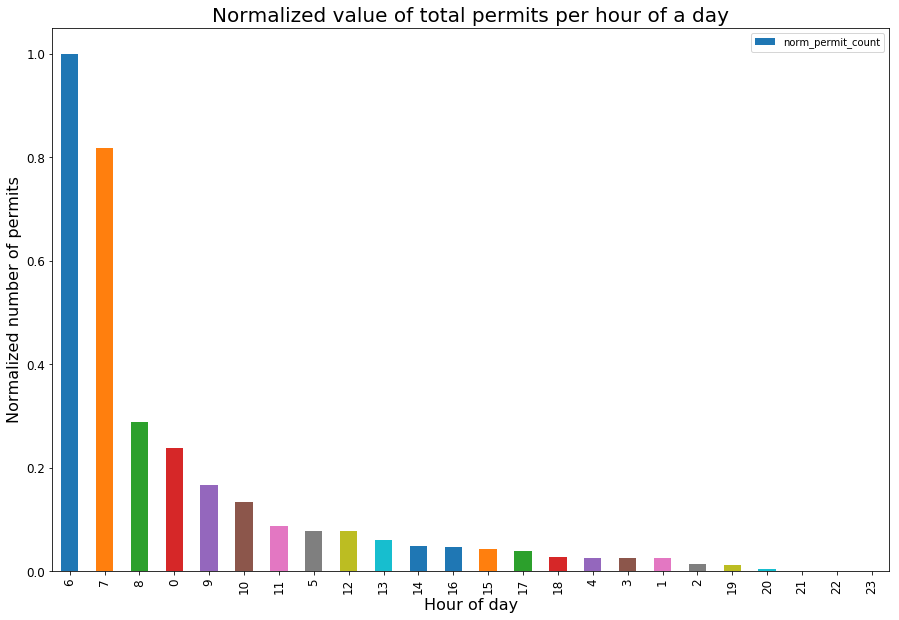

In [57]:
hourly_permits_df.plot.bar(x='hour', y='norm_permit_count', figsize=(15,10))
plt.setp(plt.gca().get_xticklabels(), rotation=90, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.xlabel('Hour of day',fontsize=16)
plt.ylabel('Normalized number of permits',fontsize=16)
plt.title('Normalized value of total permits per hour of a day',fontsize=20)
plt.show()

From the above two graphs we can see that:
* **The answer to the first question is that most popular time of day for shooting is between 5 AM and mid-day.**
* **The outlier for hour zero is due to a lot of theater shows ending at mid-night. See purple line above.**

* To answer the second question, let's find out the weekly trend for permits acquired per weekday in top five category of shooting activities

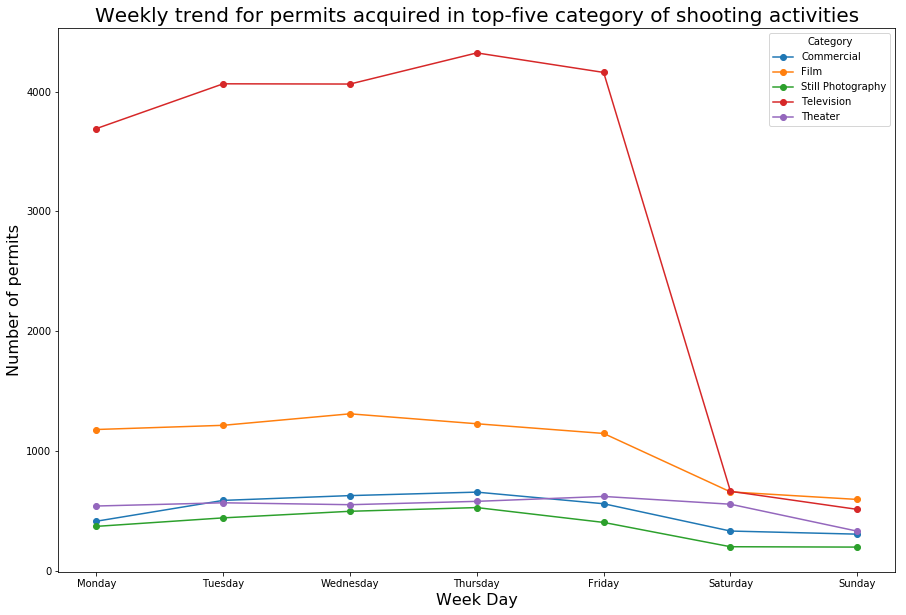

In [58]:
top_category_df.groupby(['Weekday','Category',])['EventID'].count().unstack().plot(marker='o',figsize=(15,10))
plt.title('Weekly trend for permits acquired in top-five category of shooting activities',fontsize=20)
plt.xticks(np.arange(7),weekdays)
plt.xlabel('Week Day',fontsize=16)
plt.ylabel('Number of permits',fontsize=16)
plt.show()

In [59]:
'''
Computing the normalized value of number of shooting permits per weekday
We are computing normalized values to detect if weekends are outliers for number of shooting activities.
'''
weekday_df = get_normalized_value_df(series_to_process=film_permits_df['Weekday'].value_counts(),
                                     category_col_name='weekday',count_col_name='permit_count')

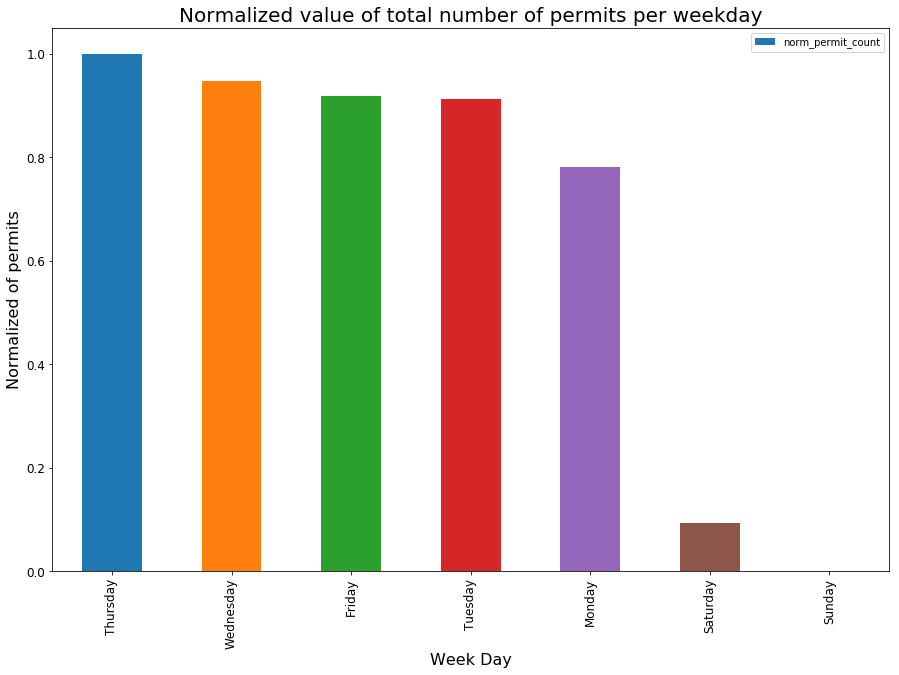

In [60]:
weekday_df.plot.bar(x='weekday', y='norm_permit_count', figsize=(15,10))
plt.setp(plt.gca().get_xticklabels(), rotation=90, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.xlabel('Week Day',fontsize=16)
plt.ylabel('Normalized of permits',fontsize=16)
plt.title('Normalized value of total number of permits per weekday',fontsize=20)
plt.show()

* **From the above two graphs of weekday-wise number of permits and the normalized value of number of permits, we can now answer the second question.**
* **We can conclude that apart from the weekend every day is fairly well balanced in matters of shooting activities**.

Next, we look at our data to find out: 
* "Can it tell me popular months of year for film shoots?"
* "Winter in New York city is very beautiful due to all the snow but are the shoots really happening in the harsh winter conditions of NYC?"

* To answer the third question, let's find out the monthly trend for permits acquired per month in top five category of shooting activities

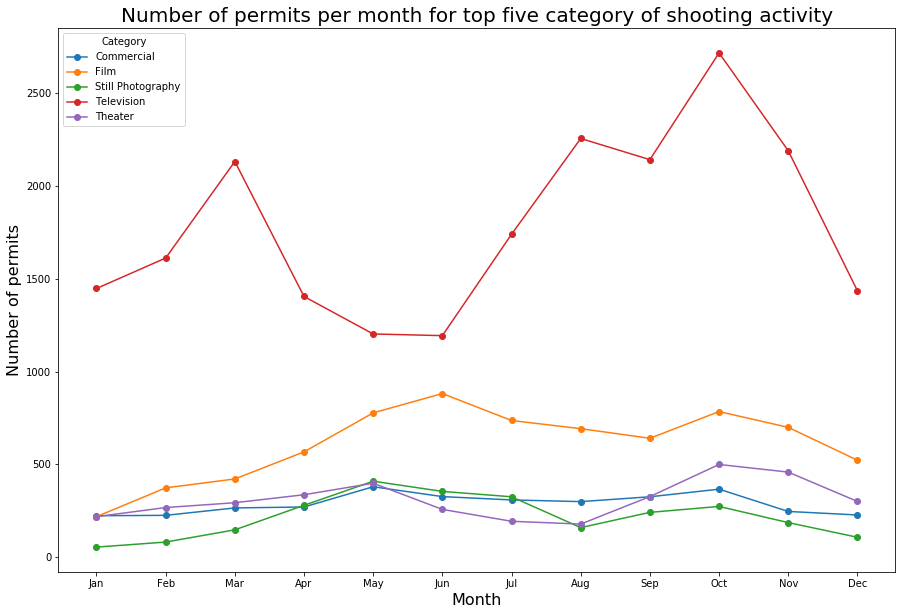

In [61]:
top_category_df.groupby(['Month','Category',])['EventID'].count().unstack().plot(marker='o',figsize=(15,10))
plt.title('Number of permits per month for top five category of shooting activity',fontsize=20)
plt.xticks(np.arange(12),months)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of permits',fontsize=16)
plt.show()

In [62]:
'''
Computing the normalized value of total number of shooting permits per month
We are computing normalized values to detect if Winter months are outliers for number of shooting activities.
'''
month_df = get_normalized_value_df(series_to_process=film_permits_df['Month'].value_counts(),
                                   category_col_name='month',count_col_name='permit_count')

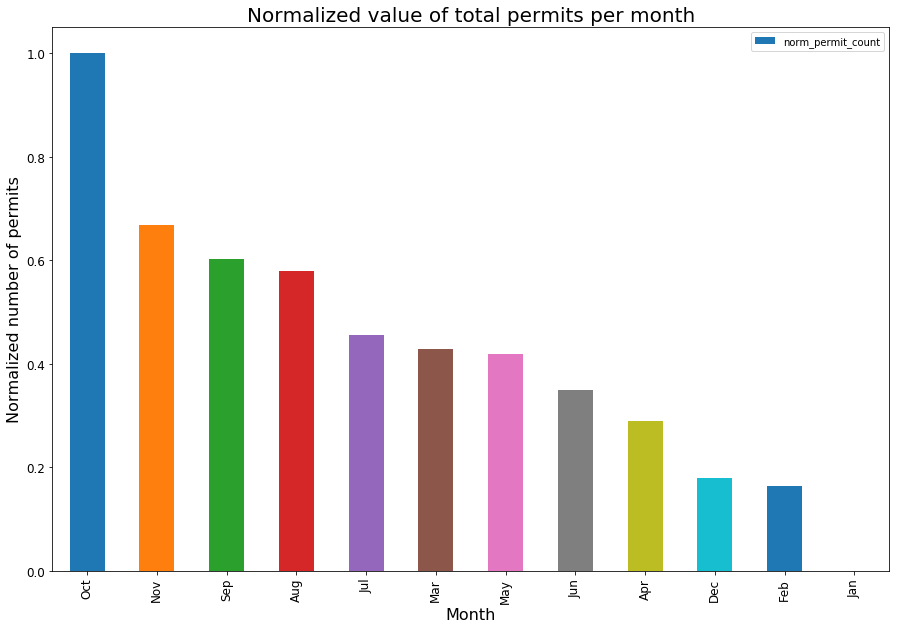

In [63]:
month_df.plot.bar(x='month', y='norm_permit_count', figsize=(15,10))
plt.setp(plt.gca().get_xticklabels(), rotation=90, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Normalized number of permits',fontsize=16)
plt.title('Normalized value of total permits per month',fontsize=20)
plt.show()

From the above two graphs of month-wise number of shooting permits in each category and normalized value of total shooting permits per month we can see that:

* Winter is generally a bad time for shooting.
* From my knowledge "of watching too many TV shows", I know that they generally follow a fall shooting schedule with a fall finale and then resume shooting in spring with a season finale. This schedule is clearly visible in this graph if you look at the red line.
* New York winters are cold. Naturally it would logically and logistically be easy to film movies during summer. We can see that pattern when we look at the orange line.
* Fall is still a good enough time to shoot outdoors in New York. More so because of fall colors that brings out the [beauty of nature](https://www.timeout.com/newyork/things-to-do/where-to-see-the-best-fall-foliage-in-nyc) in New York.


* **So, the answer to our third question is TV shoots happen in phases. Mostly in Fall but some in Spring. Movie shoots happen starting around Spring, peaking around summer and again a bit in the Fall.**
* **The graph for normalized value of total permits per month answers our fourth question that winter is really a bad time to shoot in New York City as the number of events go down but there still are a non-zero number of shooting activities happening. This is especially true for TV shows.**

From the permit data I would like to next find out the answer to: "I know some Bollywood movies have shot in Staten Island because of a large Indian community in that area but is it a popular location in general?"

In [64]:
'''
Computing the normalized value of number of shooting permits per borough and event combo
We are computing normalized values to detect if Staten Island is an outlier for number of shooting activities.
'''
borough_df = get_normalized_value_df(
    series_to_process=film_permits_df.groupby(['Borough','EventType'])['EventID'].count(),
    category_col_name='borough_and_event',
    count_col_name='permit_count')

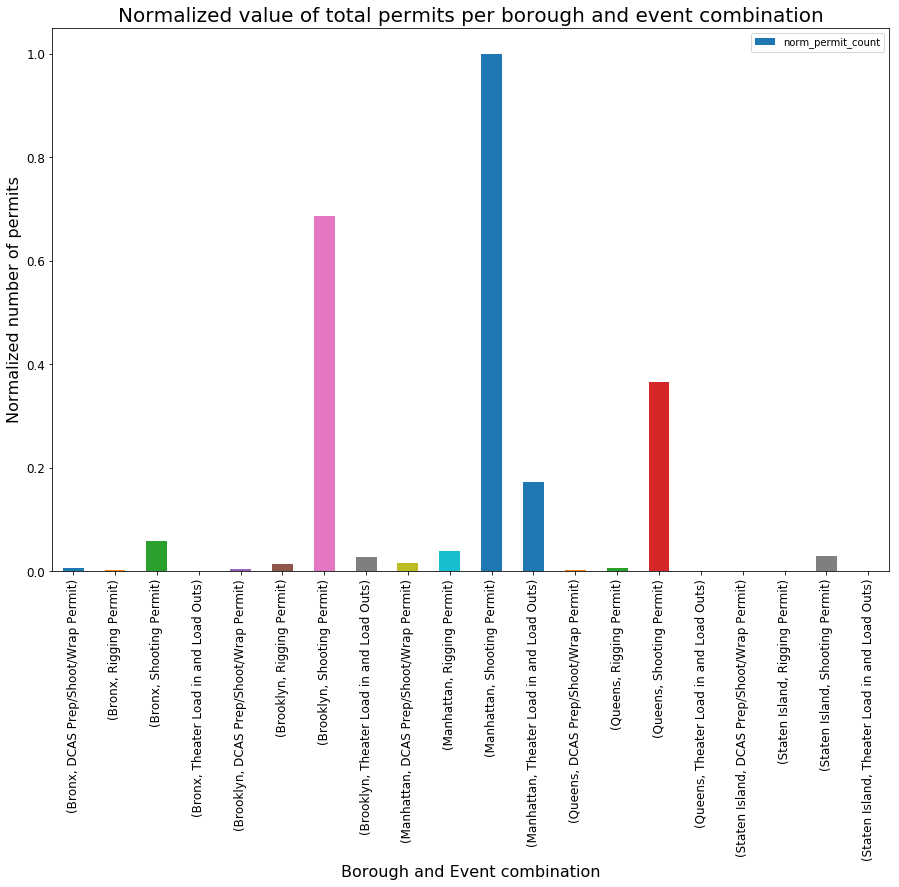

In [65]:
borough_df.plot.bar(x='borough_and_event', y='norm_permit_count', figsize=(15,10))
plt.setp(plt.gca().get_xticklabels(), rotation=90, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.xlabel('Borough and Event combination',fontsize=16)
plt.ylabel('Normalized number of permits',fontsize=16)
plt.title('Normalized value of total permits per borough and event combination',fontsize=20)
plt.show()

* From the graph above we can clearly see that shooting permits are most common in Manhattan and Brooklyn. 
* Staten Island has the lowest number among the five boroughs.


* **Which means that we have our answered the fifth question. Staten Island is NOT in-fact a popular shooting location.**

Next, we take a look at some of the less popular events that acquire shooting permits in New York City. We would like to find out the answer to: "I like a lot of web series and watch Youtube stars like Casey Neistat who films in New York City. Given the popularity of Youtube in recent times are web shoots are rising in the city?""


* If we look at year wise number of permits for each category of shooting activity, it is difficult to find out web shooting activities. As it is sort of an outlier when compared to movies or TV shoots.

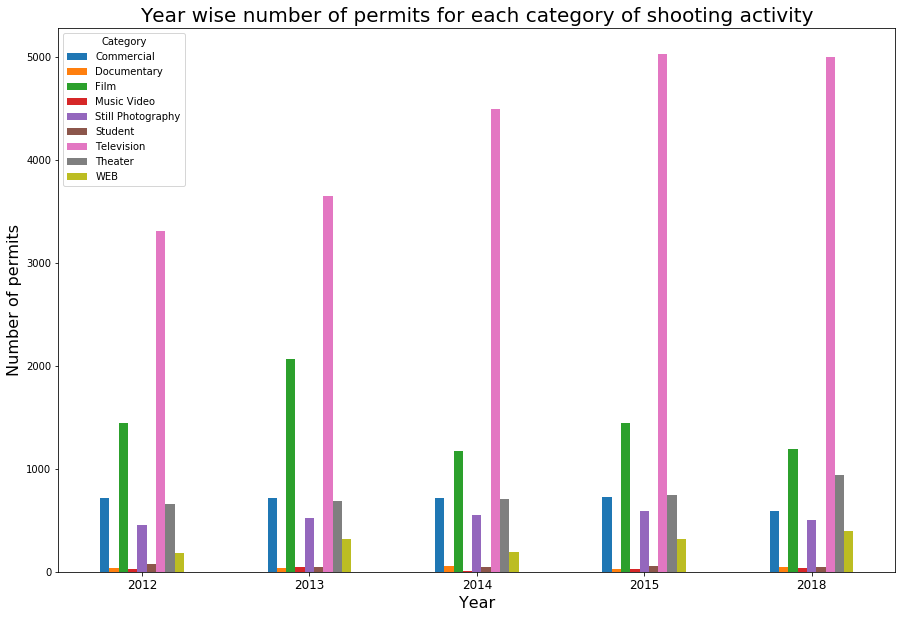

In [66]:
film_permits_df.groupby(['Year','Category'])['EventID'].count().unstack().plot(kind='bar',figsize=(15,10))
plt.title('Year wise number of permits for each category of shooting activity',fontsize=20)
plt.setp(plt.gca().get_xticklabels(), rotation=0, fontsize=12)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of permits',fontsize=16)
plt.show()

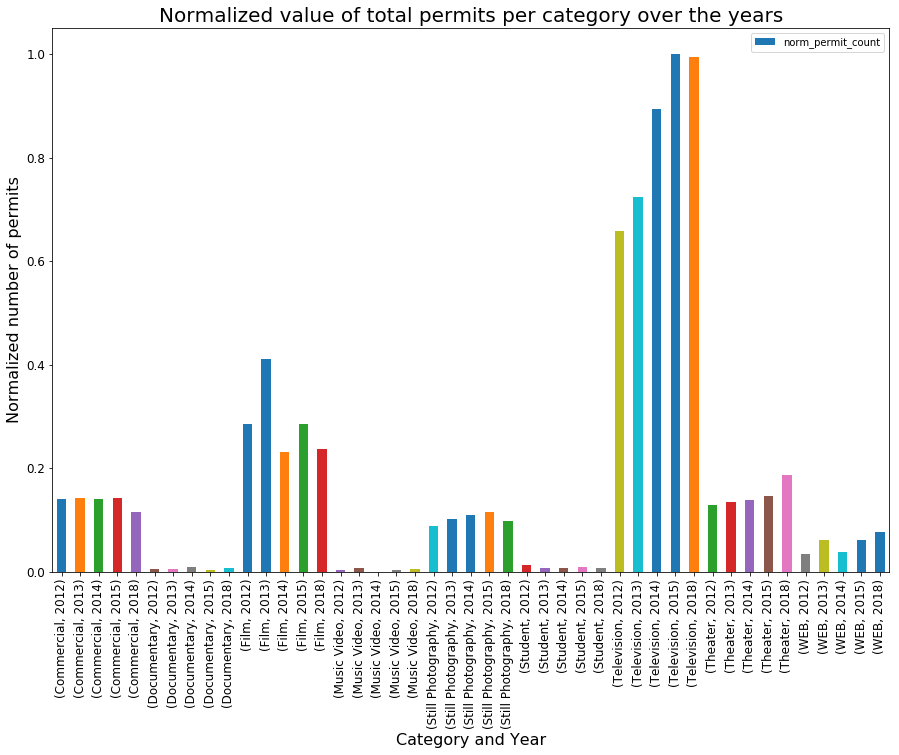

In [67]:
'''
Computing the normalized value of number of shooting permits per borough and event combo
'''
year_permit_df = get_normalized_value_df(
    series_to_process=film_permits_df.groupby(['Category','Year'])['EventID'].count(),
    category_col_name='category_year',
    count_col_name='permit_count')
year_permit_df.plot.bar(x='category_year', y='norm_permit_count', figsize=(15,10))
plt.setp(plt.gca().get_xticklabels(), rotation=90, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.xlabel('Category and Year',fontsize=16)
plt.ylabel('Normalized number of permits',fontsize=16)
plt.title('Normalized value of total permits per category over the years',fontsize=20)
plt.show()

* So we look at the data that is "NOT IN" the popular shooting activity category.

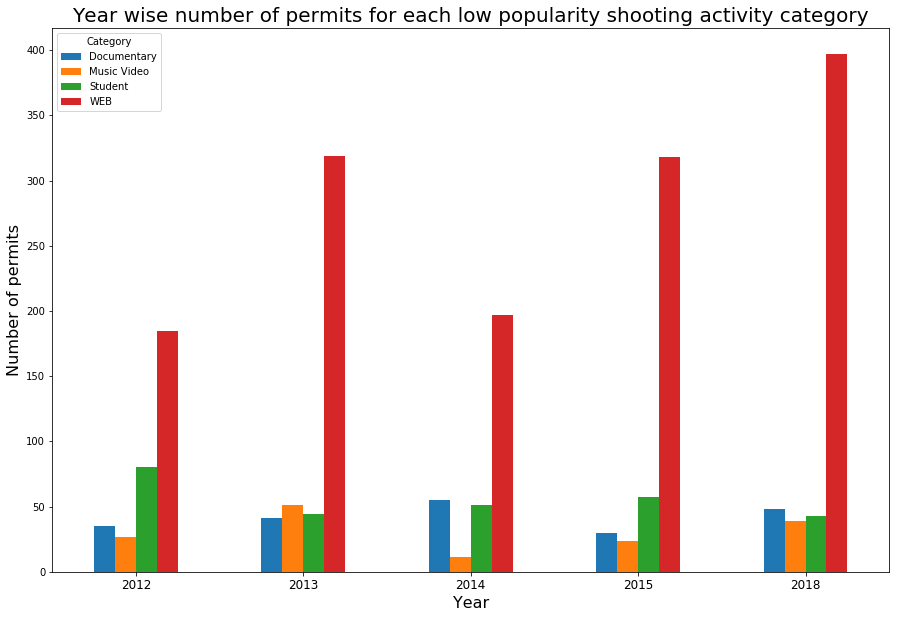

In [68]:
web_df = film_permits_df[~film_permits_df['Category'].isin(top_category)]
web_df.groupby(['Year','Category'])['EventID'].count().unstack().plot(kind='bar',figsize=(15,10))
plt.title('Year wise number of permits for each low popularity shooting activity category',fontsize=20)
plt.setp(plt.gca().get_xticklabels(), rotation=0, fontsize=12)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of permits',fontsize=16)
plt.show()

* No further normalization is required in this case, as we are just looking for an up or down trend and not detecting outliers or comparing numerical values.

* **From the above graph we can see a clear rising trend of WEB shoot activity in New York City!**

Lastly, we seek the answer for "Which locations in New York City are popular for movie shoots?"
We determine this using the areas where parking was held for a shooting. 
Assumption being people don't want to walk too far to shoot their movies/shows.

**Top ten parking held locations for shooting activities**

Remove multiple whitespaces learned from this [SO link](https://stackoverflow.com/questions/2077897/substitute-multiple-whitespace-with-single-whitespace-in-python)
Using [GeoPy](https://github.com/geopy/geopy) to extract lat long from street address

In [69]:
geolocator = Nominatim()
street_address_list = []
lat_long_list = []
parking_series = film_permits_df['ParkingHeld'].value_counts().head(10)
parking_df = pd.DataFrame(list(parking_series.items()), columns=['ParkingHeld','permit_count'])
for street_info in parking_df['ParkingHeld']:
    street_address = street_info.split('between')[0].strip()
    found_numbers = re.search(r'\d+', street_address)
    if found_numbers is not None:
        indices = list(found_numbers.span())
        street_number = street_address[indices[0]:indices[1]]
        street_parts = street_address.split(street_number)
        street_address = street_parts[0] + humanize.ordinal(street_number) + street_parts[1] + ', New York City, New York'
    else:
        street_address = street_address + ', New York City, New York'
    location_dict = geolocator.geocode(street_address).raw
    latitude = float(location_dict['lat'])
    longitude = float(location_dict['lon'])
    street_address_list.append(street_address)
    lat_long_list.append([latitude,longitude])
new_df = pd.DataFrame({'ParkingHeld':street_address_list})
parking_df.update(new_df)
parking_df['lat_long'] = lat_long_list
parking_df

,ParkingHeld,permit_count,lat_long
0,"WEST 48th STREET, New York City, New York",820,"[40.7604965, -73.9857348]"
1,"AMSTERDAM AVENUE, New York City, New York",412,"[40.8467328, -73.9318876]"
2,"WEST 55th STREET, New York City, New York",382,"[40.7656038, -73.984276]"
3,"NORTH HENRY STREET, New York City, New York",259,"[40.7202019, -73.9426657]"
4,"WEST 44th STREET, New York City, New York",224,"[40.758532, -73.9888431]"
5,"35th STREET, New York City, New York",159,"[40.7731588, -73.9110022]"
6,"MESEROLE AVENUE, New York City, New York",137,"[40.7255722, -73.9573397]"
7,"WEST 55th STREET, New York City, New York",134,"[40.7656038, -73.984276]"
8,"WEST 35th STREET, New York City, New York",133,"[40.5722429, -74.0001711]"
9,"NORTH HENRY STREET, New York City, New York",129,"[40.7202019, -73.9426657]"


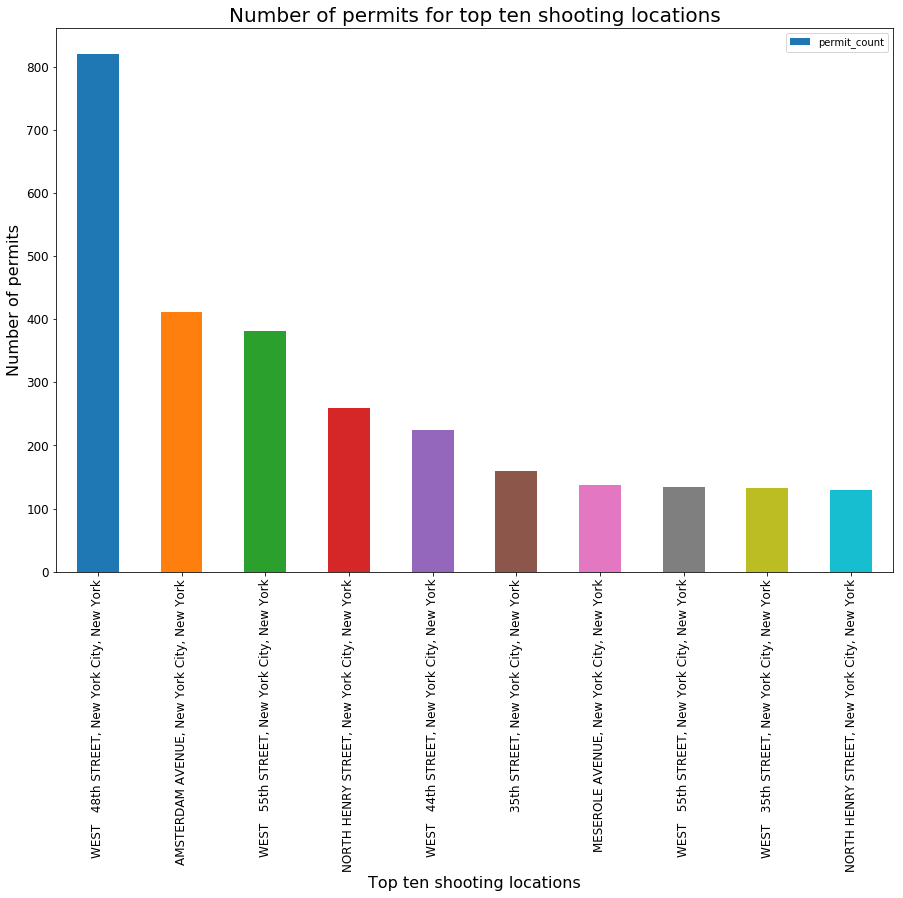

In [70]:
parking_df.plot.bar(x='ParkingHeld', y='permit_count', figsize=(15,10))
plt.setp(plt.gca().get_xticklabels(), rotation=90, fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.xlabel('Top ten shooting locations',fontsize=16)
plt.ylabel('Number of permits',fontsize=16)
plt.title('Number of permits for top ten shooting locations',fontsize=20)
plt.show()

Using the [Folium library](https://python-visualization.github.io/folium/quickstart.html) let's take a look at where the popular shooting locations are in New York City!

In [71]:
folium_map = folium.Map(location=parking_df.iloc[0]['lat_long'],
                        zoom_start=11,
                        tiles='Stamen Terrain')
for curr_loc in list(parking_df.index):
    folium.Marker(location=parking_df.iloc[curr_loc]['lat_long'],
                  popup=parking_df.iloc[curr_loc]['ParkingHeld']
                 ).add_to(folium_map)
    folium_map.add_child(folium.ClickForMarker(popup='Waypoint'))
folium_map

* The top 10 filming locations can be seen in the graph and map above.
* **WEST 48th STREET, New York City, New York** is near Times Square. Intuitively this seems to be a reasonable location to be considered popular.

In [72]:
print('Total Time taken:',time.time() - start_time,'seconds')

Total Time taken: 23.470895767211914 seconds


### Primary observations from data characterization project of New York City Film Permits

* The primary observation from this data is that we are able to gather an understanding of when and where "shooting" activities occur in New York City. 
* None of the observations seem to be unreasonable. Shoots are common in early morning hours, weekdays, during good weather and in popular locations like the Times Square.
* TV shoots follow a target TV schedule while movie shoots are fairly common during good weather.
* Winter in New York is a beautiful, time of the year but they are harsh too. Therefore it seems logical that film shoots avoid logistical issues by shooting in Spring, Summer and Fall.

### Key Learnings from Project 2 for Data 602

* I learnt about how to process date time type of objects.
* I learnt about normalization and how Scikit Learn's normalization technique does not fit into this analysis.
* I learnt how to fill up missing data using sampling and I did that in a logical way by sampling in the borough itself where the missing data exists.
* I learnt about generating latitude and longitude from street addresses using GeoPy.
* I learnt about Folium library that allowed me to find "shooting" locations on an actual map and determine where exactly they were happening!